# Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Таблица количества рейсов для каждой модели самолёта:

In [3]:
flights_for_models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Таблица среднего количества рейсов для каждого города в день

In [4]:
flights_for_cities = flights_for_cities.sort_values(by='average_flights')
flights_for_cities.tail(5)

,city,average_flights
20,Екатеринбург,11.322581
33,Красноярск,11.580645
54,Новосибирск,17.322581
70,Санкт-Петербург,31.161290
43,Москва,129.774194


Посмотрим на описание таблиц и распределение.

       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 8 to 43
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
None
AxesSubplot(0.125,0.125;0.775x0.755)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


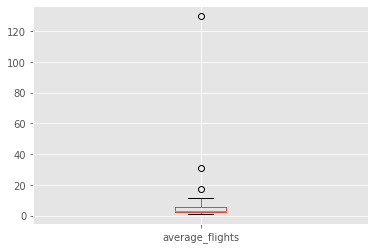

In [5]:
print(flights_for_cities.describe())
print()
print(flights_for_cities.info())
print(flights_for_cities.boxplot())
print()
print(flights_for_models.info())

Пропусков нет. Три выброса - Москва, Санкт-Петербург и Новосибирск, все три - экономические центры регионов, составляют топ-3 по численности населения городов России.

Можно предположить, что количество рейсов в город пропорционально количеству населения в городе. Проверим коэффициенты соотношения между билетами и численностью населения. Если в одном городе коэффициенты не будут совпадать, то помимо численности в этом городе есть другие факторы, повлиявшие на необходимую пропускную способность аэропортов города.

In [6]:
list = {'city':['Красноярск','Новосибирск', 'Санкт-Петербург', 'Москва'], 'flights':[11.580645, 17.322581, 31.161290, 129.774194], 'population':[1090811,1612833, 5351935,12506468]}
df = pd.DataFrame(list)
df

,city,flights,population
0,Красноярск,11.580645,1090811
1,Новосибирск,17.322581,1612833
2,Санкт-Петербург,31.161290,5351935
3,Москва,129.774194,12506468


In [7]:
df['flights_proportion'] = df['flights'] / df.loc[0, 'flights']
df['population_proportion'] = df['population'] / df.loc[0, 'population']
df['proportion'] = df['population_proportion'] / df['flights_proportion']
df

,city,flights,population,flights_proportion,population_proportion,proportion
0,Красноярск,11.580645,1090811,1.000000,1.000000,1.000000
1,Новосибирск,17.322581,1612833,1.495822,1.478563,0.988462
2,Санкт-Петербург,31.161290,5351935,2.690808,4.906382,1.823386
3,Москва,129.774194,12506468,11.206128,11.465293,1.023127


Посмотрим на коффициенты трёх наиболее популярных городов. В Новосибирске и Москве коэффициенты внутри города почти одинаковы, а в Петербурге коэффициент численности больше коэффициента нагруженности аэропортов. В таком случае есть факторы, мотивирующие не прилетать в Петербург, о которых мы не знаем.

**Топ 10 городов по количеству перелётов:**

In [8]:
top10 = flights_for_cities.sort_values(by='average_flights').tail(10)
top10

,city,average_flights
84,Ульяновск,9.580645
74,Сочи,9.612903
10,Брянск,10.000000
63,Пермь,10.129032
67,Ростов-на-Дону,10.193548
20,Екатеринбург,11.322581
33,Красноярск,11.580645
54,Новосибирск,17.322581
70,Санкт-Петербург,31.161290
43,Москва,129.774194


Text(0, 0.5, 'Встречаемость')

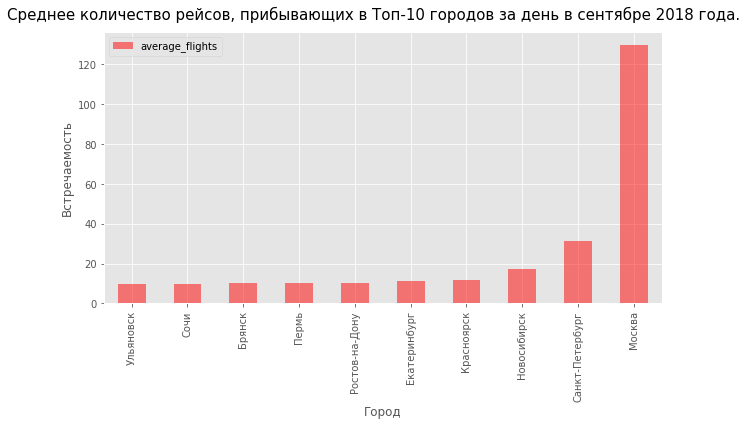

In [9]:
plt.figure(figsize=(10, 5)).suptitle('Среднее количество рейсов, прибывающих в Топ-10 городов за день в сентябре 2018 года.', fontsize=15, y=0.95, x=0.5)
top10.groupby('city')['average_flights'].sum().sort_values().plot(kind='bar', color='red' , alpha=0.5)
plt.legend()
plt.xlabel('Город')
plt.ylabel('Встречаемость')

Среди Топ-10 особенно выделяется Москва и Петербург.

**Анализ количества рейсов для каждой модели самолетов**

Text(0, 0.5, 'Встречаемость')

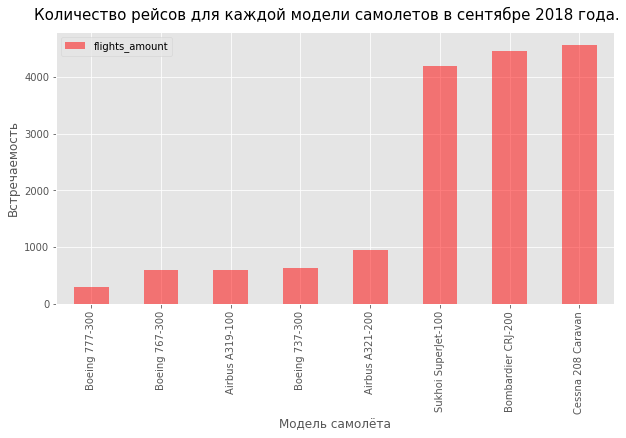

In [10]:
plt.figure(figsize=(10, 5)).suptitle('Количество рейсов для каждой модели самолетов в сентябре 2018 года.', fontsize=15, y=0.95, x=0.5)
flights_for_models.groupby('model')['flights_amount'].sum().sort_values().plot(kind='bar', color='red' , alpha=0.5)
plt.legend()
plt.xlabel('Модель самолёта')
plt.ylabel('Встречаемость')

Видны две группы: низковстречаемые Airbus, Boeing и высоковстречаемые Bombardier, Cessna, Sukhoi. Лидеры по перевозкам - мелкие самолеты, которые, скорее всего, обслуживают частные рейсы или же летают в труднодоступных регионах. Ввиду коротких расстояний, статистика получается внушительная.


**Анализ среднего количества рейсов, прибывающих в город**

Text(0, 0.5, 'Встречаемость')

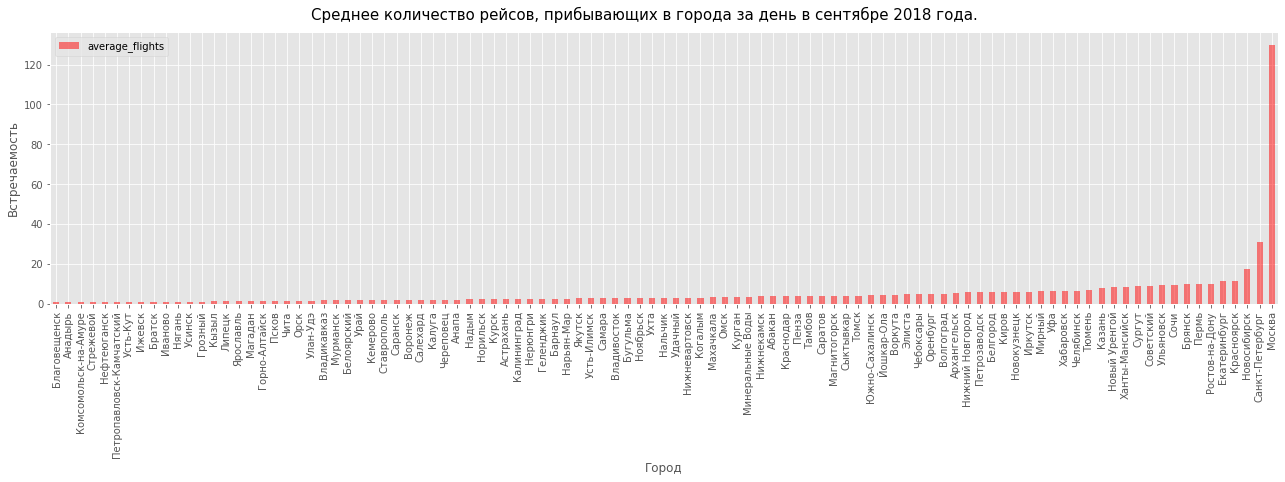

In [11]:
plt.figure(figsize=(22, 5)).suptitle('Среднее количество рейсов, прибывающих в города за день в сентябре 2018 года.', fontsize=15, y=0.95, x=0.5)
flights_for_cities.groupby('city')['average_flights'].sum().sort_values().plot(kind='bar', color='red' , alpha=0.5)
plt.legend()
plt.xlabel('Город')
plt.ylabel('Встречаемость')
#plt.ylim(0, 2)

Глобально 3 города занимают 32% всех перелётов, а 10 городов из 101 - 45%. Распределение всех авиаперелётов совершенно неравномерно.

In [12]:
print(sum(flights_for_cities['average_flights']), ' - общая сумма')
print(sum(flights_for_cities.tail(3)['average_flights']), ' - три города, соотношение - ', sum(flights_for_cities.tail(3)['average_flights']) * 100/ sum(flights_for_cities['average_flights']))
print(sum(flights_for_cities.tail(10)['average_flights']), ' - десять городов, соотношение - ', sum(flights_for_cities.tail(10)['average_flights']) * 100/ sum(flights_for_cities['average_flights']))

554.9131005030683  - общая сумма
178.25806451612902  - три города, соотношение -  32.12359995727716
250.6774193548387  - десять городов, соотношение -  45.1741757633009


## Общий вывод

Города-лидеры по рейсам (32% от общего количества) — это экономические центры трёх регионов: Севера, Центра и Дальнего Востока. Следует также отметить, что ТОП-10 городов составляют почти половину (45%) от общего количества рейсов. 

Также большинство рейсов используют малогарабитные самолёты, что позволяет летать в отдалённые небольшие города с малым пассажиропотоком.

Можно отметить аномалию для города Санкт-Петербург в соотношении населения к количеству рейсов в день. Здесь следует подробнее разобраться в причинах такого различия. Можно предположить несколько причин:
1. Предоставлены неполные данные о рейсах для данного города.
2. Для данного города популярны другие виды транспорта (автобусы, поезда)
